In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import sdss_measurements
littleh = 0.7


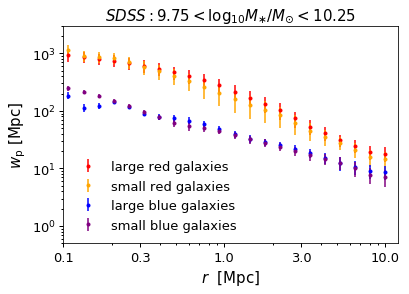

In [40]:
from matplotlib import ticker 

fig, ax = plt.subplots(1, 1)


__=ax.loglog()
xlim = ax.set_xlim(0.1, 12)
xlabel = ax.set_xlabel(r'$r$  $[{\rm Mpc}]$')
ylabel = ax.set_ylabel(r'$w_{\rm p}$ $[{\rm Mpc}]$')
# title = ax.set_title(r'$SDSS: 10^{9.75}M_{\odot} < M_{\ast} < 10^{10.25}M_{\odot}$')

title = ax.set_title(r'$SDSS: 9.75 < \log_{10}M_{\ast}/M_{\odot} < 10.25$')

x = sdss_measurements.rp*littleh
__=ax.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_red_sm9p75_sm10p25_large*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_red_sm9p75_sm10p25*littleh, 
               fmt='.', color='red', label=r'large red galaxies')
__=ax.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_red_sm9p75_sm10p25_small*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_red_sm9p75_sm10p25*littleh, 
               fmt='.', color='orange', label=r'small red galaxies')
__=ax.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_blue_sm9p75_sm10p25_large*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_blue_sm9p75_sm10p25*littleh, 
               fmt='.', color='blue', label=r'large blue galaxies')
__=ax.errorbar(x, 
               sdss_measurements.wp_sdss_mpajhu_blue_sm9p75_sm10p25_small*littleh, 
               sdss_measurements.wperr_sdss_mpajhu_blue_sm9p75_sm10p25*littleh, 
               fmt='.', color='purple', label=r'small blue galaxies')

ylim = ax.set_ylim(0.5, 3000)
leg = ax.legend()
__=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax.set_xticks((0.1, 0.3, 1, 3, 10))

figname = 'color_selected_size_dependent_clustering.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')
